In [ ]:
#Import statsmodel, pandas, and numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

#Import Boston datasets from scikit-learn datasets and load 
boston_data=datasets.load_boston()

#Describe the dataset 
print(boston_data.DESCR)
#print(boston_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Define the data/predictors as the pre-set feature names   
boston_data_df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Put the target (housing value -- MEDV) in another DataFrame 
target=pd.DataFrame(boston_data.target,columns=['MEDV'])
#Print first five rows 
target.head(n=5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
#Define 'RM' as X or the feature and 'MEDV' as y or the label 
feature=boston_data_df['RM']
label=target['MEDV']

#Build the model and define 'predictions' 
linear_reg=sm.OLS(label,feature).fit()

predictions=linear_reg.predict(feature)

print('the predicted values are',predictions)

#Print out the statistics 
linear_reg.summary()



the predicted values are 0      24.020779
1      23.458163
2      26.249323
3      25.566146
4      26.110495
         ...    
501    24.086539
502    22.358504
503    25.485772
504    24.820863
505    22.029703
Length: 506, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                   3.74e-256
Time:                        18:29:39   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

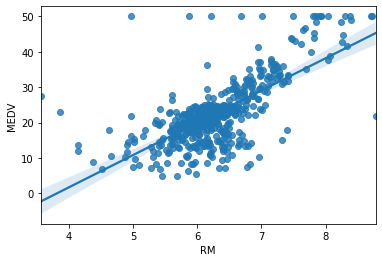

In [ ]:
#plotting the graph
sns.regplot(data=boston_data_df,x=feature,y=label)

In [ ]:
#Define 'RM' as X or the feature and 'MEDV' as y or the label 
feature1=boston_data_df[['RM','LSTAT']]
label=target['MEDV']

#Build the model and define 'predictions' 
linear_reg=sm.OLS(label,feature1).fit()

predictions=linear_reg.predict(feature1)

print('the predictions for this model are',predictions)

#Print out the statistics 
linear_reg.summary()

the predictions for this model are 0      28.997322
1      25.513780
2      32.613488
3      32.410653
4      31.574564
         ...    
501    26.010226
502    24.076146
503    30.532203
504    29.088325
505    24.421412
Length: 506, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                        0.00
Time:                        18:32:54   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What does a coefficient of determination of R2= .948 mean:


Ans: This means that for this model 94.8% of the variation in the independent variables or the features explain the variation in the target variable.In this case it means that varaition in the MEDV variable can be explained 94.8% times by the varition in the idependent variables 'RM' and 'LSTAT'


Is there any autocorrelation? If not, why? 


Ans:Yes, there is a positive autocorrelation because the Durbin-Watson value is less than 2.



Are the data coming from a normal distribution? Why?



Ans: no this data is not coming from a normal distribution because the Prob(JB) value is 9.70e-97 which is close to 0 but not exactly 0. And the data is normally distributed only if the rob(JB)  value is equal to 0. Also, we can see that  the data is skewed to the right as it has a Skew value greater than 0.5.

In [ ]:
from sklearn import linear_model

#Define the data/predictors as 'RM' and 'LSTAT' 
predictor_new=(boston_data_df[["RM", "LSTAT"]])
#print(predictor_new)
#Put the target (housing value -- MEDV) in another DataFrame 
new_target=pd.DataFrame(boston_data.target,columns=['MEDV'])



In [ ]:
X=predictor_new[['RM','LSTAT']]
Y=new_target['MEDV']

lm=linear_model.LinearRegression()
new_model=lm.fit(X,Y)

new_predictions=lm.predict(X)

print('the first 10 predictions are',new_predictions[0:10])

the first 10 predictions are [28.94101368 25.48420566 32.65907477 32.40652    31.63040699 28.05452701
 21.28707846 17.78559653  8.10469338 18.24650673]


In [ ]:
#the score for the model
lm.score(X,Y)

0.6385616062603403

In [ ]:
#the intercept for the model
lm.intercept_

-1.3582728118745138

In [ ]:
#the coefficients for the model
lm.coef_

array([ 5.09478798, -0.64235833])